# 2022 Championship EDA

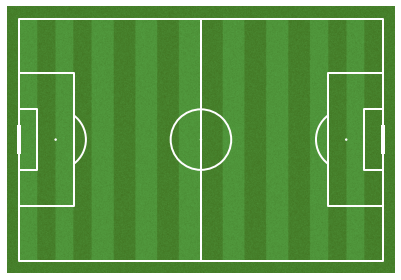

In [2]:
from mplsoccer.pitch import Pitch
pitch = Pitch(pitch_color='grass', line_color='white', stripe=True)
fig, ax = pitch.draw()

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

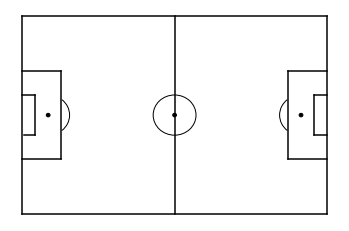

In [4]:
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

def createPitch():
    
    #Create figure
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)

    #Pitch Outline & Centre Line
    plt.plot([0,0],[0,90], color="black")
    plt.plot([0,130],[90,90], color="black")
    plt.plot([130,130],[90,0], color="black")
    plt.plot([130,0],[0,0], color="black")
    plt.plot([65,65],[0,90], color="black")
    
    #Left Penalty Area
    plt.plot([16.5,16.5],[65,25],color="black")
    plt.plot([0,16.5],[65,65],color="black")
    plt.plot([16.5,0],[25,25],color="black")
    
    #Right Penalty Area
    plt.plot([130,113.5],[65,65],color="black")
    plt.plot([113.5,113.5],[65,25],color="black")
    plt.plot([113.5,130],[25,25],color="black")
    
    #Left 6-yard Box
    plt.plot([0,5.5],[54,54],color="black")
    plt.plot([5.5,5.5],[54,36],color="black")
    plt.plot([5.5,0.5],[36,36],color="black")
    
    #Right 6-yard Box
    plt.plot([130,124.5],[54,54],color="black")
    plt.plot([124.5,124.5],[54,36],color="black")
    plt.plot([124.5,130],[36,36],color="black")
    
    #Prepare Circles
    centreCircle = plt.Circle((65,45),9.15,color="black",fill=False)
    centreSpot = plt.Circle((65,45),0.8,color="black")
    leftPenSpot = plt.Circle((11,45),0.8,color="black")
    rightPenSpot = plt.Circle((119,45),0.8,color="black")
    
    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)
    
    #Prepare Arcs
    leftArc = Arc((11,45),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((119,45),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")

    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)
    
    #Tidy Axes
    plt.axis('off')
    
    #Display Pitch
    plt.show()
    
createPitch()

In [5]:
prem_team_stats = pd.read_csv('../../footy_data/england-premier-league-teams-2021-to-2022-stats.csv')
prem_games = pd.read_csv('../../footy_data/england-premier-league-matches-2021-to-2022-stats.csv')
champ_team_stats = pd.read_csv('../../footy_data/england-championship-teams-2021-to-2022-stats.csv')
champ_games = pd.read_csv('../../footy_data/england-championship-matches-2021-to-2022-stats.csv')
league_one_team_stats = pd.read_csv('../../footy_data/england-efl-league-one-teams-2021-to-2022-stats.csv')
league_one_games = pd.read_csv('../../footy_data/england-efl-league-one-matches-2021-to-2022-stats.csv')
league_two_team_stats = pd.read_csv('../../footy_data/england-efl-league-two-teams-2021-to-2022-stats.csv')
league_two_games = pd.read_csv('../../footy_data/england-efl-league-two-matches-2021-to-2022-stats.csv')
segunda_team_stats = pd.read_csv('../../footy_data/spain-segunda-division-teams-2021-to-2022-stats.csv')
segunda_games = pd.read_csv('../../footy_data/spain-segunda-division-matches-2021-to-2022-stats.csv')
laliga_team_stats = pd.read_csv('../../footy_data/spain-la-liga-teams-2021-to-2022-stats.csv')
laliga_games = pd.read_csv('../../footy_data/spain-la-liga-matches-2021-to-2022-stats.csv')

In [6]:
prem_games = prem_games.loc[prem_games['status'] == 'complete']
champ_games = champ_games.loc[champ_games['status'] == 'complete']
league_one_games = league_one_games.loc[league_one_games['status'] == 'complete']
league_two_games = league_two_games.loc[league_two_games['status'] == 'complete']
segunda_games = segunda_games.loc[segunda_games['status'] == 'complete']
laliga_games = laliga_games.loc[laliga_games['status'] == 'complete']
#Played matches

In [7]:
champ_team_stats['real_xg'] = ""
champ_team_stats['real_xga'] = ""
league_one_team_stats['real_xg'] = ""
league_one_team_stats['real_xga'] = ""
league_two_team_stats['real_xg'] = ""
league_two_team_stats['real_xga'] = ""
segunda_team_stats['real_xg'] = ""
segunda_team_stats['real_xga'] = ""
prem_team_stats['real_xg'] = ""
prem_team_stats['real_xga'] = ""
laliga_team_stats['real_xg'] = ""
laliga_team_stats['real_xga'] = ""
#Setting up to fix xg and xga

The average xG stats for each team in Footystats' spreadsheet is incorrect, so I'll write a function to fill it myself 

In [8]:
def xg_fixer(team_name, team_stats, league_games):
    total = league_games.loc[league_games['home_team_name'] == team_name, 'team_a_xg'].sum()
    total = total + league_games.loc[league_games['away_team_name'] == team_name, 'team_b_xg'].sum()
    total = total / (team_stats.loc[team_stats['common_name'] == team_name, 'matches_played'].iloc[0])
    team_stats['real_xg'] = np.where(team_stats['common_name'] == team_name, total, team_stats['real_xg'])

In [9]:
def xg_against_fixer(team_name, team_stats, league_games):
    total = league_games.loc[league_games['home_team_name'] == team_name, 'team_b_xg'].sum()
    #Want team B this time because we want goals against
    total = total + league_games.loc[league_games['away_team_name'] == team_name, 'team_a_xg'].sum()
    total = total / (team_stats.loc[team_stats['common_name'] == team_name, 'matches_played'].iloc[0])
    team_stats['real_xga'] = np.where(team_stats['common_name'] == team_name, total, team_stats['real_xga'])

# Fix xG and xGA

Leagues with 24 teams

In [10]:
for i in range (0,24):
    xg_fixer(champ_team_stats['common_name'][i], champ_team_stats, champ_games)
    xg_fixer(league_one_team_stats['common_name'][i], league_one_team_stats, league_one_games)
    xg_fixer(league_two_team_stats['common_name'][i], league_two_team_stats, league_two_games)
    xg_against_fixer(champ_team_stats['common_name'][i], champ_team_stats, champ_games)
    xg_against_fixer(league_one_team_stats['common_name'][i], league_one_team_stats, league_one_games)
    xg_against_fixer(league_two_team_stats['common_name'][i], league_two_team_stats, league_two_games)

Leagues with 22 Teams

In [11]:
for i in range (0,22):
    xg_fixer(segunda_team_stats['common_name'][i], segunda_team_stats, segunda_games)
    xg_against_fixer(segunda_team_stats['common_name'][i], segunda_team_stats, segunda_games)

Leagues with 20 Teams

In [12]:
for i in range (0,20):
    xg_fixer(prem_team_stats['common_name'][i], prem_team_stats, prem_games)
    xg_fixer(laliga_team_stats['common_name'][i], laliga_team_stats, laliga_games)
    xg_against_fixer(prem_team_stats['common_name'][i], prem_team_stats, prem_games)
    xg_against_fixer(laliga_team_stats['common_name'][i], laliga_team_stats, laliga_games)

# Fill Stats

In [13]:
champ_games['home_xg'] = ""
champ_games['away_xg'] = ""
champ_games['home_xg_against'] = ""
champ_games['away_xg_against'] = ""
champ_games['home_total_corners'] = ""
champ_games['away_total_corners'] = ""

laliga_games['home_xg'] = ""
laliga_games['away_xg'] = ""
laliga_games['home_xg_against'] = ""
laliga_games['away_xg_against'] = ""
laliga_games['home_total_corners'] = ""
laliga_games['away_total_corners'] = ""

segunda_games['home_xg'] = ""
segunda_games['away_xg'] = ""
segunda_games['home_xg_against'] = ""
segunda_games['away_xg_against'] = ""
segunda_games['home_total_corners'] = ""
segunda_games['away_total_corners'] = ""

league_one_games['home_xg'] = ""
league_one_games['away_xg'] = ""
league_one_games['home_xg_against'] = ""
league_one_games['away_xg_against'] = ""
league_one_games['home_total_corners'] = ""
league_one_games['away_total_corners'] = ""

league_two_games['home_xg'] = ""
league_two_games['away_xg'] = ""
league_two_games['home_xg_against'] = ""
league_two_games['away_xg_against'] = ""
league_two_games['home_total_corners'] = ""
league_two_games['away_total_corners'] = ""

prem_games['home_xg'] = ""
prem_games['away_xg'] = ""
prem_games['home_xg_against'] = ""
prem_games['away_xg_against'] = ""
prem_games['home_total_corners'] = ""
prem_games['away_total_corners'] = ""

# Creating new columns where our xg and corner data will go

ValueError: Length of values does not match length of index

In [13]:
prem_xg_stats = dict(prem_team_stats[['common_name', 'real_xg']].values)
prem_corner_stats = dict(prem_team_stats[['common_name', 'corners_per_match']].values)
prem_xga_stats = dict(prem_team_stats[['common_name', 'real_xga']].values)
champ_xg_stats = dict(champ_team_stats[['common_name', 'real_xg']].values)
champ_corner_stats = dict(champ_team_stats[['common_name', 'corners_per_match']].values)
champ_xga_stats = dict(champ_team_stats[['common_name', 'real_xga']].values)
league_one_xg_stats = dict(league_one_team_stats[['common_name', 'real_xg']].values)
league_one_corner_stats = dict(league_one_team_stats[['common_name', 'corners_per_match']].values)
league_one_xga_stats = dict(league_one_team_stats[['common_name', 'real_xga']].values)
league_two_xg_stats = dict(league_two_team_stats[['common_name', 'real_xg']].values)
league_two_corner_stats = dict(league_two_team_stats[['common_name', 'corners_per_match']].values)
league_two_xga_stats = dict(league_two_team_stats[['common_name', 'real_xga']].values)
laliga_xg_stats = dict(laliga_team_stats[['common_name', 'real_xg']].values)
laliga_corner_stats = dict(laliga_team_stats[['common_name', 'real_xg']].values)
laliga_xga_stats = dict(laliga_team_stats[['common_name', 'real_xg']].values)
segunda_xg_stats = dict(segunda_team_stats[['common_name', 'real_xg']].values)
segunda_corner_stats = dict(segunda_team_stats[['common_name', 'corners_per_match']].values)
segunda_xga_stats = dict(segunda_team_stats[['common_name', 'real_xga']].values)
#creating new variables for the average stats -- eventually will go into the GAMES df for the leagues
#By making this into dictionaries, it will be easier to call them/update them with the function

In [14]:
def fill_stats(team, games, xg_stats, xga_stats, corner_stats):
    games['home_xg'] = np.where(games['home_team_name'] == team, xg_stats[team], games['home_xg'])
    games['away_xg'] = np.where(games['away_team_name'] == team, xg_stats[team], games['away_xg'])
    games['home_xg_against'] = np.where(games['home_team_name'] == team, xga_stats[team], games['home_xg_against'])
    games['away_xg_against'] = np.where(games['away_team_name'] == team, xga_stats[team], games['away_xg_against'])
    games['home_total_corners'] = np.where(games['home_team_name'] == team, corner_stats[team], games['home_total_corners'])
    games['away_total_corners'] = np.where(games['away_team_name'] == team, corner_stats[team], games['away_total_corners'])
#Function to put team stats into games dataframe

24 Team Leagues

In [15]:
for i in range (0,24):
    fill_stats(champ_team_stats['common_name'][i], champ_games, champ_xg_stats, champ_xga_stats, champ_corner_stats)
    fill_stats(league_one_team_stats['common_name'][i], league_one_games, league_one_xg_stats, league_one_xga_stats, league_one_corner_stats)
    fill_stats(league_two_team_stats['common_name'][i], league_two_games, league_two_xg_stats, league_two_xga_stats, league_two_corner_stats)
#Filling stats in for leagues with 24 teams

22 Team Leagues

In [16]:
for i in range (0,22):
    fill_stats(segunda_team_stats['common_name'][i], segunda_games, segunda_xg_stats, segunda_xga_stats, segunda_corner_stats)

20 Team Leagues

In [17]:
for i in range (0,20):
    fill_stats(laliga_team_stats['common_name'][i], laliga_games, laliga_xg_stats, laliga_xga_stats, laliga_corner_stats)
    fill_stats(prem_team_stats['common_name'][i], prem_games, prem_xg_stats, prem_xga_stats, prem_corner_stats)

# English Championship

In [18]:
xg_view = champ_games[['home_team_name', 'away_team_name', 'team_a_xg', 'team_b_xg', 'home_team_goal_count', 'away_team_goal_count']]
xg_view[(len(champ_games) - 50):len(champ_games)]
#We just want to see the most recent games here

,home_team_name,away_team_name,team_a_xg,team_b_xg,home_team_goal_count,away_team_goal_count
178,Swansea City,Peterborough United,1.64,0.38,3,0
179,Reading,AFC Bournemouth,1.24,1.20,0,2
180,Birmingham City,Bristol City,1.53,1.22,3,0
181,Coventry City,Swansea City,1.43,1.23,1,2
182,Luton Town,Middlesbrough,1.31,1.31,3,1
183,Millwall,Reading,1.99,0.83,1,0
184,Nottingham Forest,Sheffield United,1.17,1.09,1,1
185,Peterborough United,Huddersfield Town,1.43,1.29,1,1
186,AFC Bournemouth,Preston North End,1.66,1.04,1,2
187,Barnsley,Derby County,1.00,1.50,2,1


# Goal Analysis

In [19]:
season_goal_total = champ_games['total_goal_count'].sum()
season_1h_goal_total = champ_games['total_goals_at_half_time'].sum()
percent_goals_1h = ((season_1h_goal_total)/(season_goal_total)) * 100

In [20]:
print(f'There were {season_goal_total} goals scored this season')

There were 562 goals scored this season


In [21]:
print(f'There were {season_1h_goal_total} goals scored in the 1H this season, ')

There were 230 goals scored in the 1H this season, 


In [22]:
round(season_1h_goal_total/season_goal_total, 2)
#% of first half goals

0.41

In [23]:
champ_games['total_goals_at_half_time'].value_counts()

1    88
0    78
2    48
3    10
4     4
Name: total_goals_at_half_time, dtype: int64

In [24]:
champ_games.columns

Index(['timestamp', 'date_GMT', 'status', 'attendance', 'home_team_name',
       'away_team_name', 'referee', 'Game Week', 'Pre-Match PPG (Home)',
       'Pre-Match PPG (Away)', 'home_ppg', 'away_ppg', 'home_team_goal_count',
       'away_team_goal_count', 'total_goal_count', 'total_goals_at_half_time',
       'home_team_goal_count_half_time', 'away_team_goal_count_half_time',
       'home_team_goal_timings', 'away_team_goal_timings',
       'home_team_corner_count', 'away_team_corner_count',
       'home_team_yellow_cards', 'home_team_red_cards',
       'away_team_yellow_cards', 'away_team_red_cards',
       'home_team_first_half_cards', 'home_team_second_half_cards',
       'away_team_first_half_cards', 'away_team_second_half_cards',
       'home_team_shots', 'away_team_shots', 'home_team_shots_on_target',
       'away_team_shots_on_target', 'home_team_shots_off_target',
       'away_team_shots_off_target', 'home_team_fouls', 'away_team_fouls',
       'home_team_possession', 'away_te

More Columns

Let's write a function to help fill xg in our games df

# Over/Under 2.5?

In [25]:
champ_games['over/under'] = np.where(champ_games['home_team_goal_count'] + champ_games['away_team_goal_count'] > 2.5, 1, 0)
# Adding column 0 represents under 2.5, 1 represents over 2.5

In [26]:
champ_games['over/under'].value_counts()

0    122
1    106
Name: over/under, dtype: int64

# League One

In [27]:
xg_view = league_one_games[['home_team_name', 'away_team_name', 'team_a_xg', 'team_b_xg', 'home_team_goal_count', 'away_team_goal_count']]
xg_view[(len(league_one_games) - 50):len(league_one_games)]

,home_team_name,away_team_name,team_a_xg,team_b_xg,home_team_goal_count,away_team_goal_count
169,Wigan Athletic,Lincoln City,2.09,1.38,1,2
170,Cambridge United,AFC Wimbledon,1.35,1.18,1,0
171,Charlton Athletic,Doncaster Rovers,2.16,0.39,4,0
172,Cheltenham Town,Sheffield Wednesday,1.60,1.75,2,2
173,Crewe Alexandra,Milton Keynes Dons,0.93,1.53,1,4
174,Fleetwood Town,Wycombe Wanderers,1.83,2.27,3,3
175,Gillingham,Accrington Stanley,2.27,1.41,0,0
176,Lincoln City,Shrewsbury Town,1.67,2.15,1,1
177,Oxford United,Morecambe,1.58,2.04,3,1
178,Plymouth Argyle,Ipswich Town,1.60,1.21,2,1


# League Two

In [28]:
xg_view = league_two_games[['home_team_name', 'away_team_name', 'team_a_xg', 'team_b_xg', 'home_team_goal_count', 'away_team_goal_count']]
xg_view[(len(league_two_games) - 50):len(league_two_games)]

,home_team_name,away_team_name,team_a_xg,team_b_xg,home_team_goal_count,away_team_goal_count
164,Swindon Town,Bradford City,1.43,1.39,1,3
165,Tranmere Rovers,Northampton Town,1.00,1.97,0,2
166,Walsall,Barrow,1.87,1.40,2,2
167,Colchester United,Sutton United,1.00,1.72,1,3
168,Northampton Town,Carlisle United,1.34,0.97,3,0
169,Bradford City,Forest Green Rovers,1.50,1.20,1,1
170,Colchester United,Scunthorpe United,1.10,1.30,2,1
171,Crawley Town,Port Vale,1.01,2.58,1,4
172,Harrogate Town,Bristol Rovers,1.35,0.89,0,1
173,Leyton Orient,Hartlepool United,1.85,0.69,5,0


# La Liga

In [29]:
xg_view = laliga_games[['home_team_name', 'away_team_name', 'team_a_xg', 'team_b_xg', 'home_team_goal_count', 'away_team_goal_count']]
xg_view[(len(laliga_games) - 50):len(laliga_games)]

,home_team_name,away_team_name,team_a_xg,team_b_xg,home_team_goal_count,away_team_goal_count
86,CA Osasuna,Granada CF,1.90,1.21,1,1
87,Valencia CF,RCD Mallorca,2.44,1.27,2,2
88,Cádiz,Deportivo Alavés,2.37,1.12,0,2
89,Elche CF,RCD Espanyol,2.05,2.18,2,2
90,Athletic Club Bilbao,Villarreal,2.00,1.36,2,1
91,Sevilla FC,Levante UD,2.25,1.53,5,3
92,FC Barcelona,Real Madrid,1.58,1.52,1,2
93,Real Betis,Rayo Vallecano,1.59,1.42,3,2
94,Atlético Madrid,Real Sociedad,2.06,1.08,2,2
95,Getafe CF,Celta de Vigo,1.19,2.04,0,3


# Segunda

In [30]:
xg_view = segunda_games[['home_team_name', 'away_team_name', 'team_a_xg', 'team_b_xg', 'home_team_goal_count', 'away_team_goal_count']]
xg_view[(len(segunda_games) - 50):len(segunda_games)]

,home_team_name,away_team_name,team_a_xg,team_b_xg,home_team_goal_count,away_team_goal_count
137,CF Fuenlabrada,Girona FC,1.69,1.39,1,2
138,Real Oviedo,Málaga CF,2.27,1.13,2,1
139,Real Valladolid,SD Eibar,1.45,1.49,2,0
140,Real Zaragoza,Mirandés,1.09,2.13,1,1
141,AD Alcorcón,UD Ibiza,1.04,1.26,0,2
142,CD Tenerife,Burgos CF,2.13,1.23,4,0
143,SD Ponferradina,SD Huesca,2.24,0.99,1,1
144,Sporting Gijón,Almería,1.31,2.06,0,1
145,Leganés,FC Cartagena,1.82,0.86,1,1
146,Mirandés,CD Lugo,1.80,1.34,3,2


# For Later

In [31]:
# league[['goals_min_0_to_10', 'goals_min_11_to_20', 'goals_min_21_to_30',
#        'goals_min_31_to_40', 'goals_min_41_to_50', 'goals_min_51_to_60',
#        'goals_min_61_to_70', 'goals_min_71_to_80', 'goals_min_81_to_90',
#        'goals_min_0_to_15', 'goals_min_16_to_30', 'goals_min_31_to_45',
#        'goals_min_46_to_60', 'goals_min_61_to_75', 'goals_min_76_to_90',
#        'xg_avg_per_match']]

In [32]:
#For new xg and xga data

#games['avg_home_xg_for_home_team'] = ""
# games['avg_away_xg_against_home_team'] = ""
# games['avg_xg_for_home_team'] = ""
# games['avg_xg_against_home_team'] = ""
# games['avg_home_xg_for_away_team'] = ""
# games['avg_away_xg_against_away_team'] = ""
# games['avg_xg_for_away_team'] = ""
# games['avg_xg_against_away_team'] = ""

In [33]:
usl_matches = pd.read_csv('../../footy_data/usa-usl-championship-matches-2021-to-2021-stats.csv')

FileNotFoundError: [Errno 2] File ../../footy_data/usa-usl-championship-matches-2021-to-2021-stats.csv does not exist: '../../footy_data/usa-usl-championship-matches-2021-to-2021-stats.csv'

In [ ]:
xg_view = usl_matches[['home_team_name', 'away_team_name', 'team_a_xg', 'team_b_xg', 'home_team_goal_count', 'away_team_goal_count']]
xg_view[(len(usl_matches) - 50):len(usl_matches)]

In [ ]:
xg_view[xg_view['home_team_name'] == 'Louisville City']

In [ ]:
xg_view[xg_view['away_team_name'] == 'Louisville City']